# Байесовский классификатор

# Пример с числовыми данными

Датасет взят с [kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. (c)

Целевая переменная - `Outcome`.

In [4]:
# библиотеки для работы с матрицами и таблицами
import pandas as pd
import numpy as np

# визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# игнорируем уведомления
from warnings import filterwarnings
filterwarnings("ignore")

import itertools
from collections import Counter

In [5]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


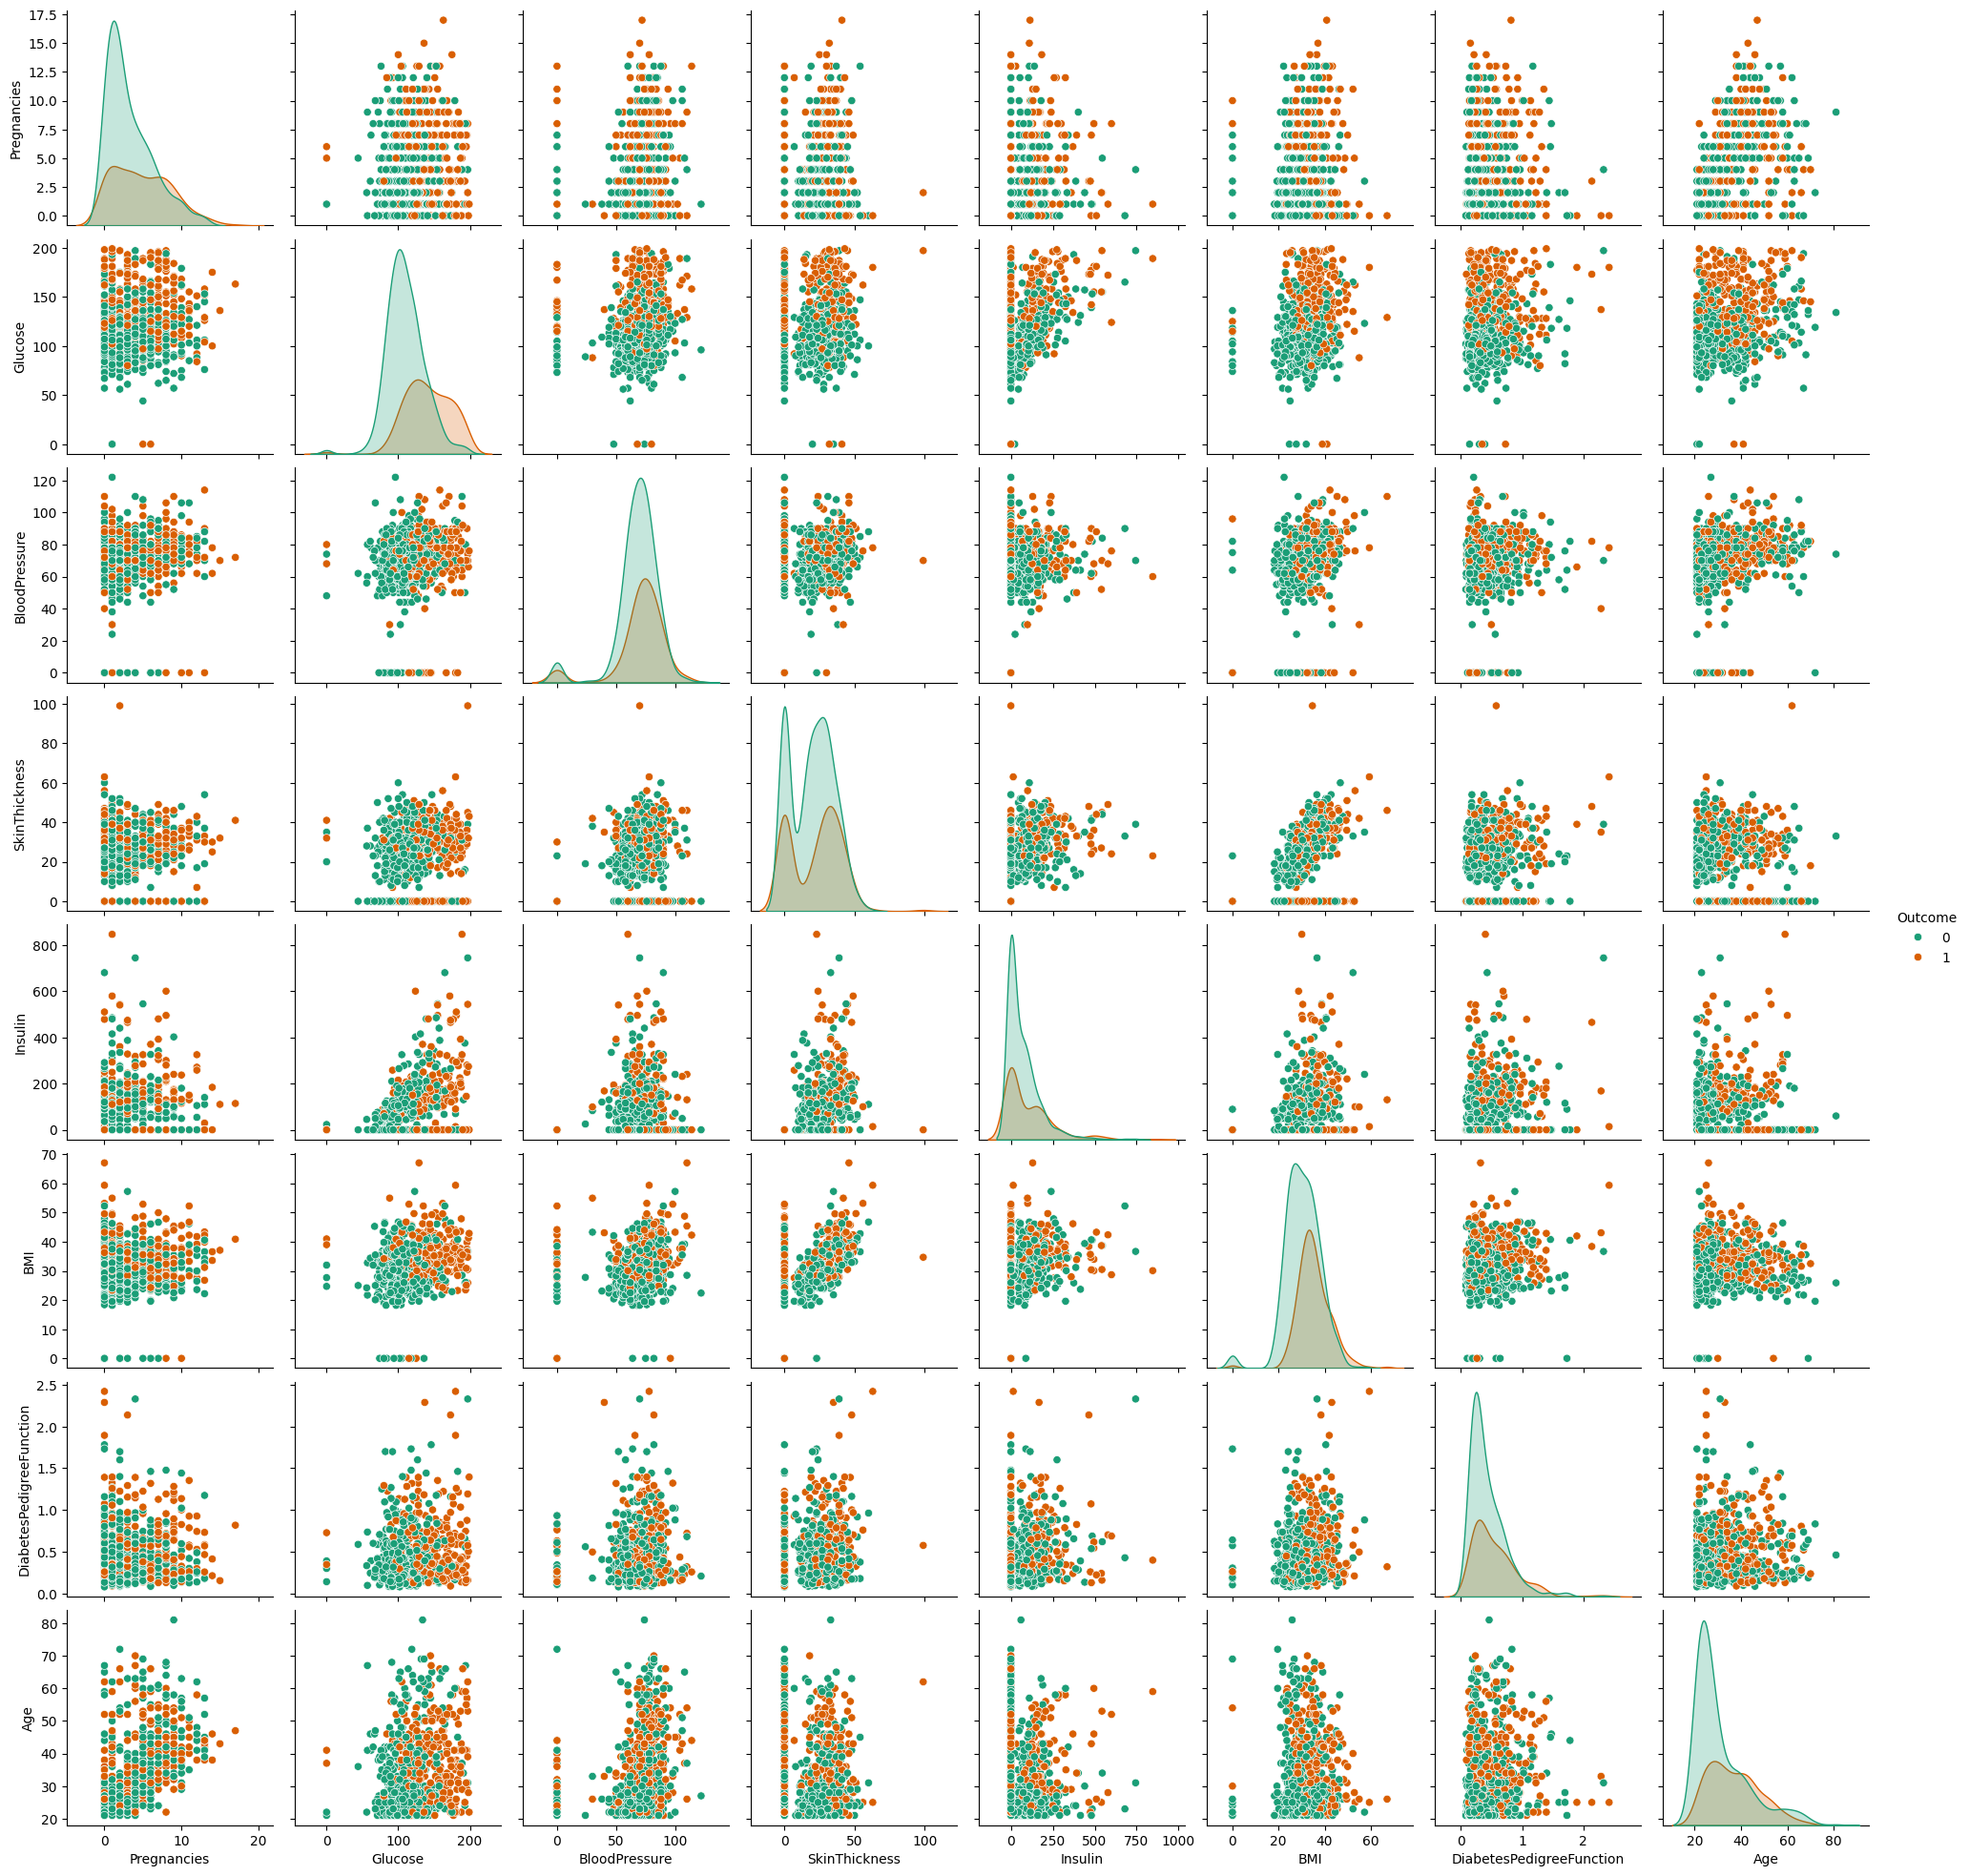

In [9]:
sns.pairplot(df,hue='Outcome',palette='Dark2');

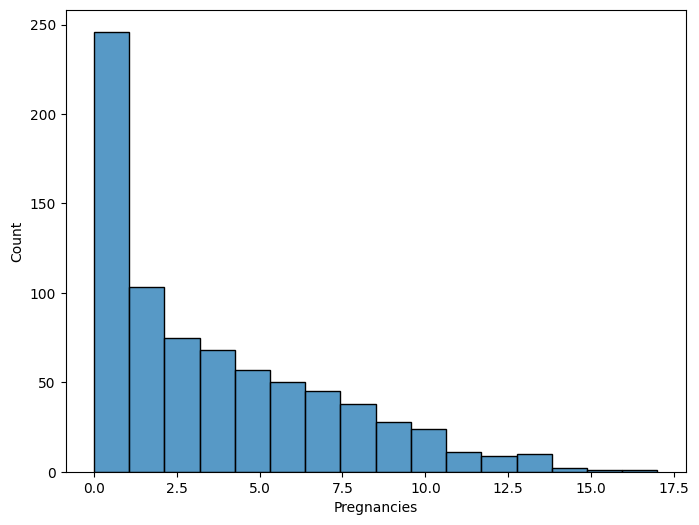

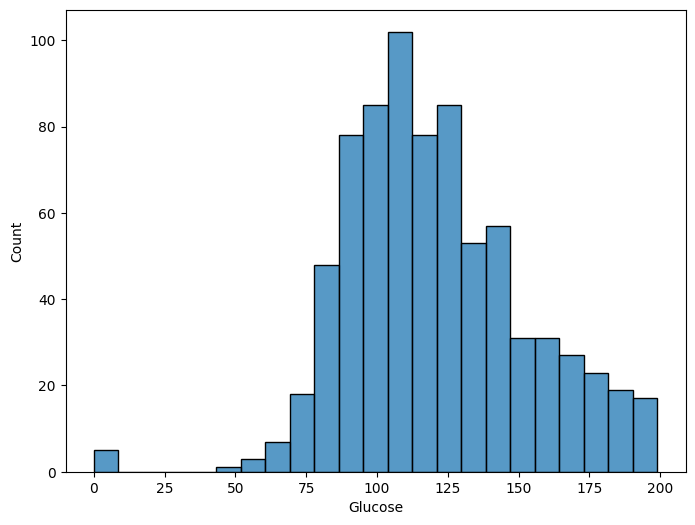

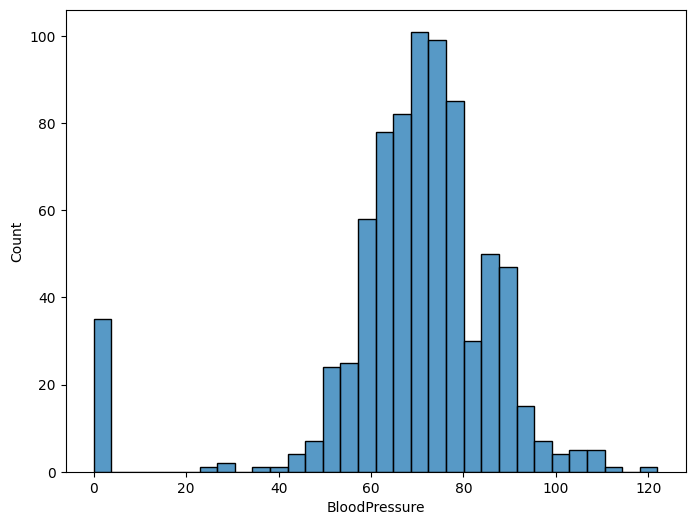

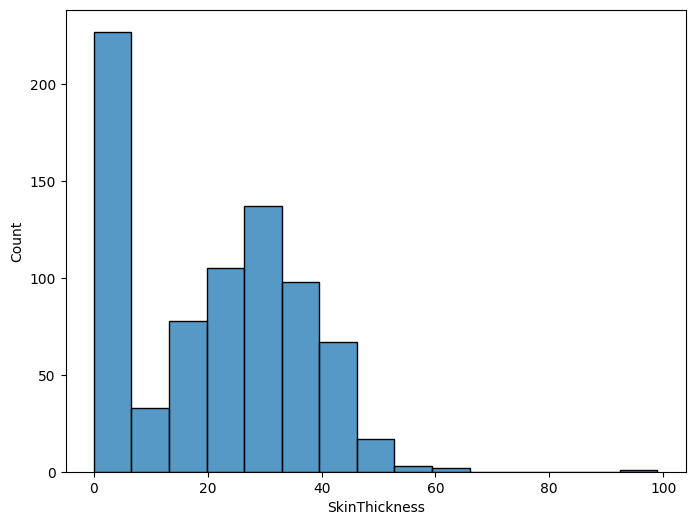

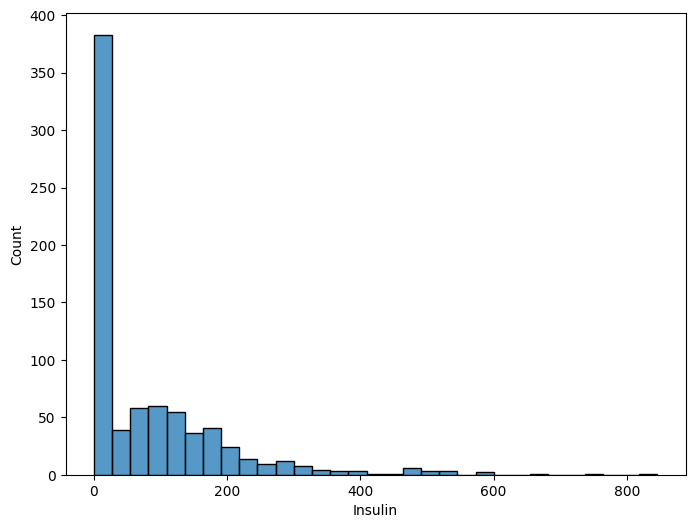

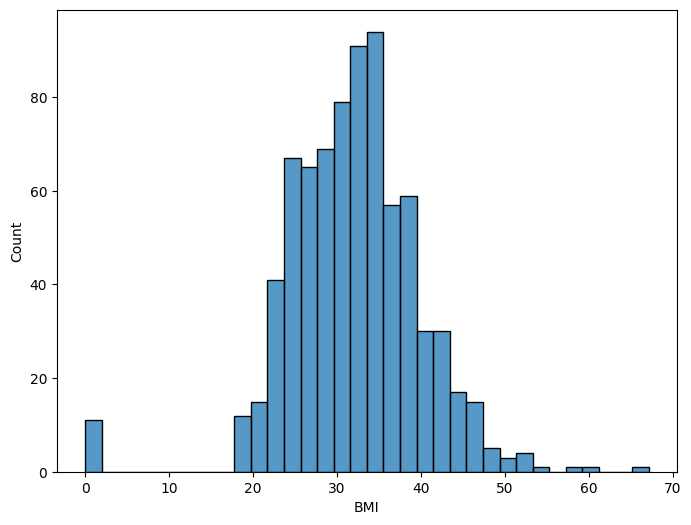

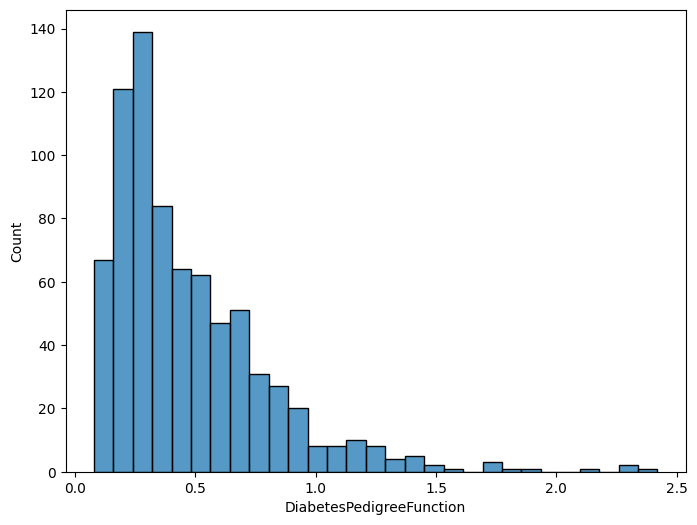

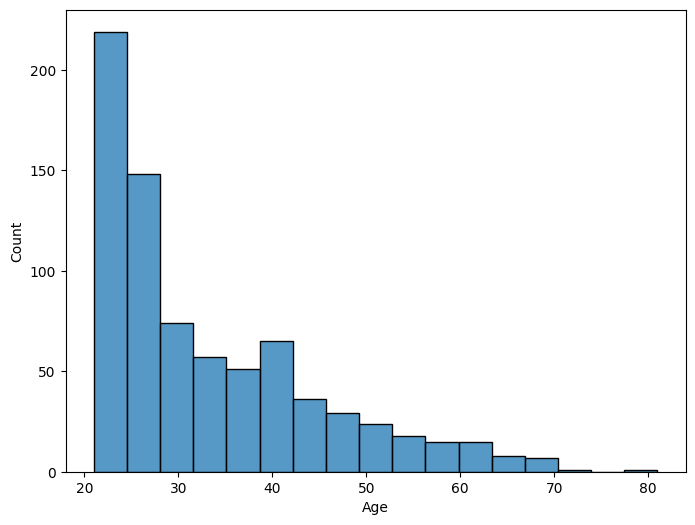

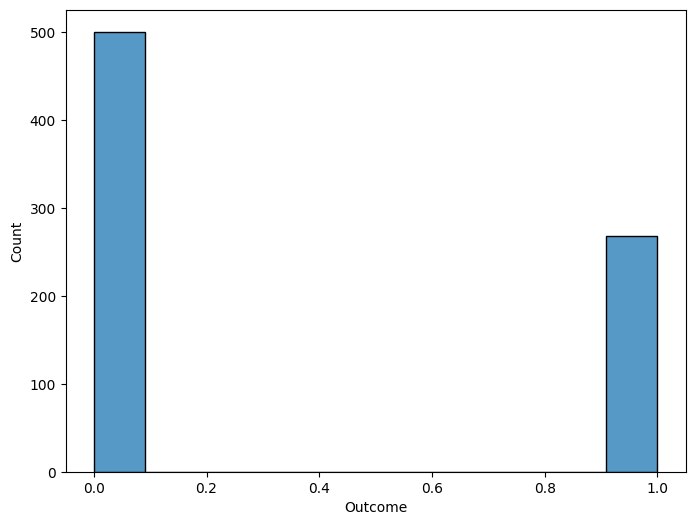

In [10]:
for i in df.keys():
    plt.figure(figsize=(8,6))
    sns.histplot(df[i]);

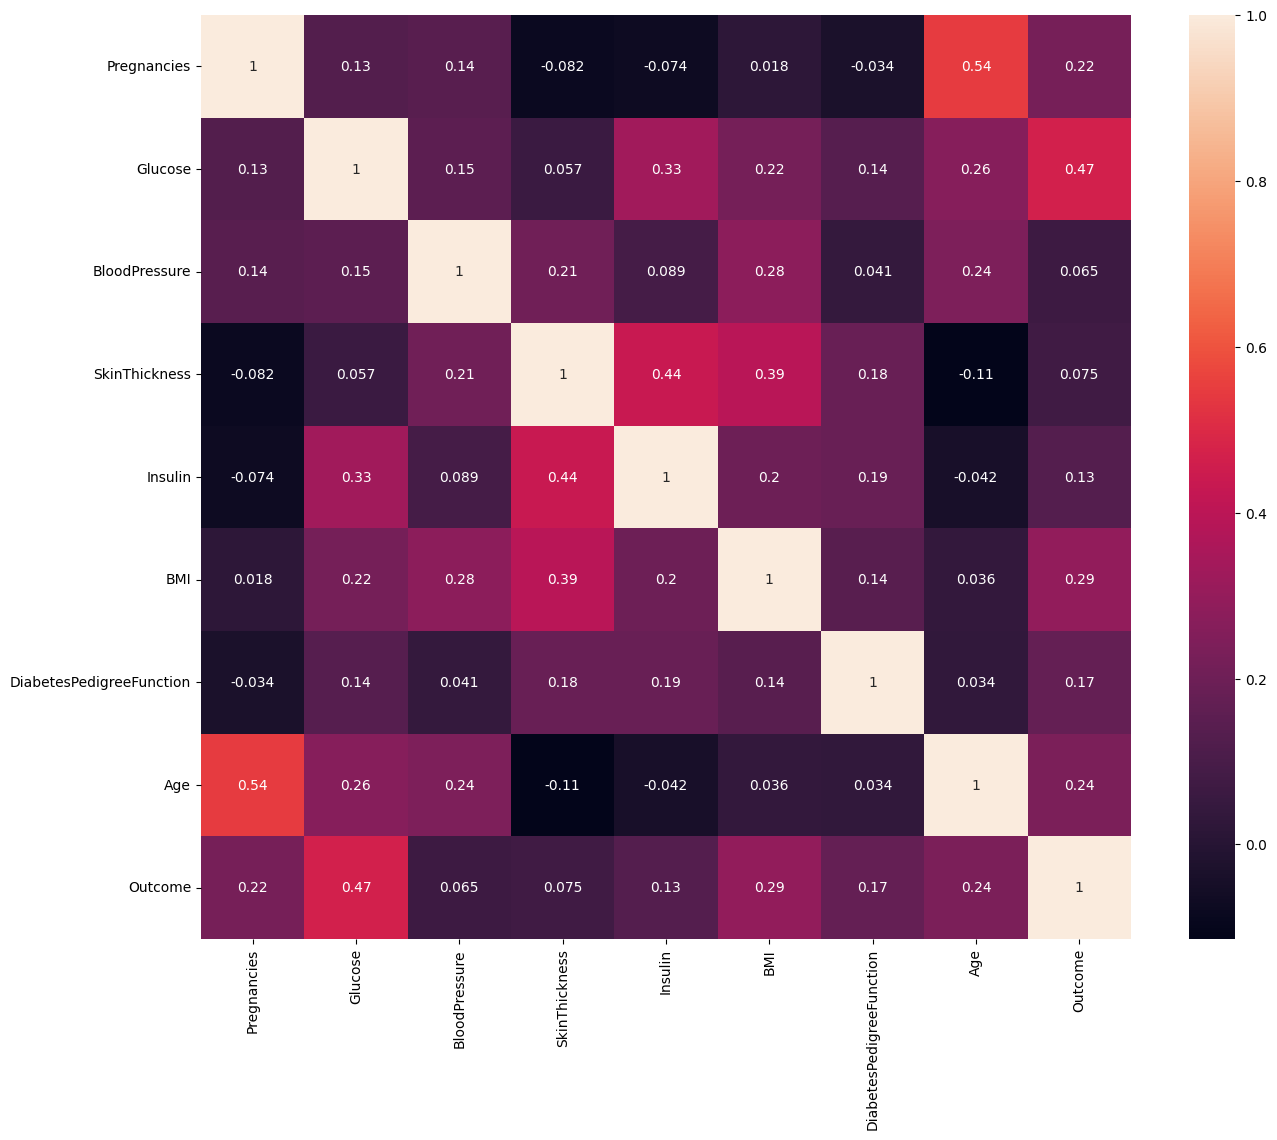

In [11]:
# Отрисуем матрицу корреляций параметров.
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True);

In [12]:
# Сформируем X и y
X = df.drop("Outcome",axis=1)
y= df["Outcome"]

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22)

In [13]:
nb = GaussianNB()

nb.fit(X_train,y_train);

In [14]:
# Прогноз на тесте
y_pred = nb.predict(X_test)
nb.score(X_test, y_test)

0.7402597402597403

# Пример с текстовыми данными. Спам

Одним из первых примеров, которые приходят в голову при обсуждении алгоритма Наивный Байес, является поиск спама в почте. До этого мы с вами всегда работали с численными данными, в случае же писем необходимо работать с текстовыми. Подготовка подобного датасета сильно отличается от препроцессинга с числовыми данными, но давайте посмотрим на вводный пример по работе с текстовыми датасетами и попробуем построить свою модель, которая будет прогнозировать, является ли письмо спамом.

Датасет взят с [kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [15]:
df = pd.read_csv("data/spam.csv", encoding = "latin-1", usecols=["v1", "v2"])
df.columns = ["label", "message"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


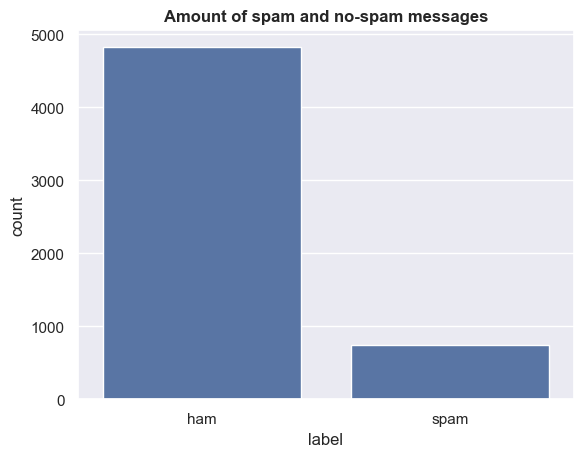

In [18]:
sns.set()
sns.countplot(data = df, x= df["label"]).set_title("Amount of spam and no-spam messages", fontweight = "bold")
plt.show()

### Анализ текста сообщений
Сформировать Top 15 и Bottom 15 слов в спаме и в обычных сообщениях

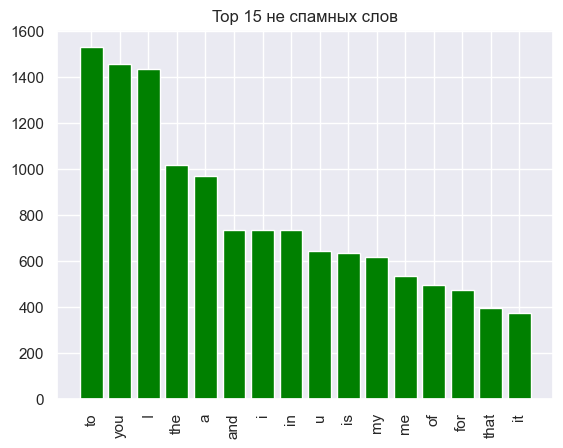

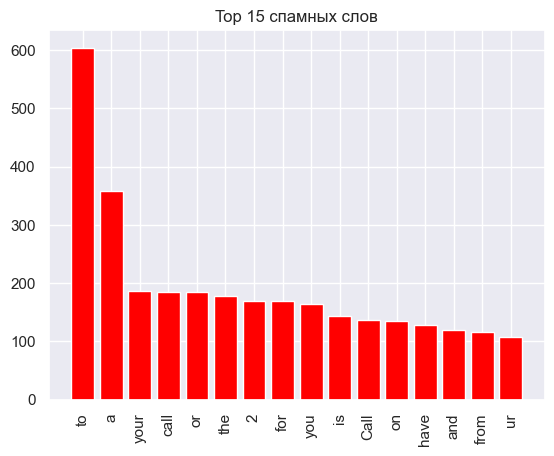

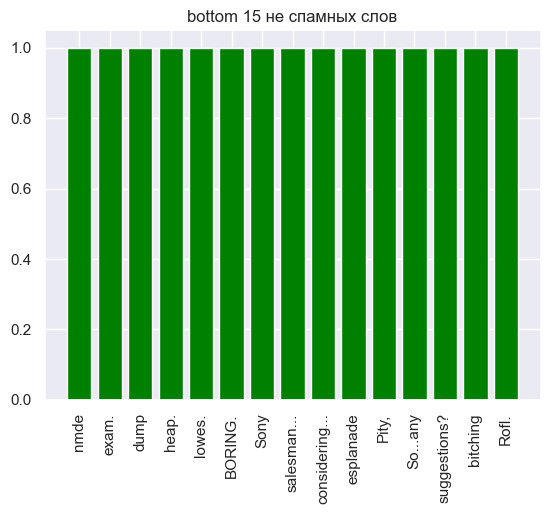

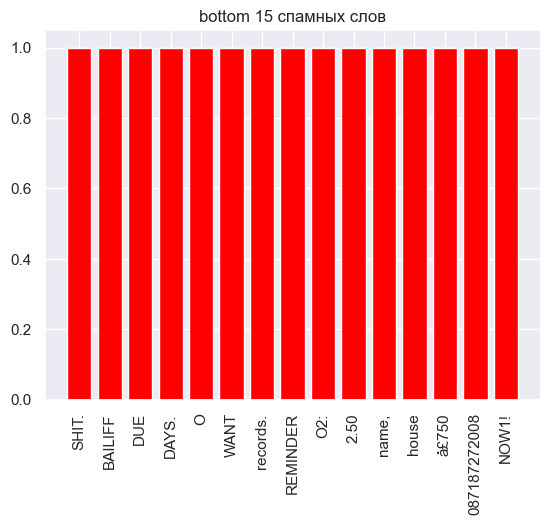

In [19]:
non_spam_messages = df[df["label"]=="ham"]["message"] # возьмем не спам
l = [message.split() for message in non_spam_messages] # сформируем список слов
no_spam_words = list(itertools.chain.from_iterable(l)) # объединим

spam_messages = df[df["label"]=="spam"]["message"] # возьмем спам
k = [message.split() for message in spam_messages] # сформируем список слов
spam_words = list(itertools.chain.from_iterable(k)) # объединим

non_spam = Counter(no_spam_words) # словарь слов в неспамных письмах
spam = Counter(spam_words) # словарь слов в спамных письмах

non_spam = sorted(non_spam.items(), key=lambda kv: kv[1], reverse=True)
spam = sorted(spam.items(), key=lambda kv: kv[1], reverse=True) 

top15_spam = spam[:16]
top15_nonspam = non_spam[:16]

top_words_nonspam = [i[0] for i in top15_nonspam]  
top_occurences_nonspam = [i[1] for i in top15_nonspam]

top_words_spam = [i[0] for i in top15_spam]       
top_occurences_spam = [i[1] for i in top15_spam]

bottom15_spam = spam[-15:]
bottom15_nonspam = non_spam[-15:]

bottom_words_nonspam = [i[0] for i in bottom15_nonspam]  
bottom_occurences_nonspam = [i[1] for i in bottom15_nonspam]

bottom_words_spam = [i[0] for i in bottom15_spam]       
bottom_occurences_spam = [i[1] for i in bottom15_spam]

plt.bar(top_words_nonspam, top_occurences_nonspam, color = 'green')
plt.title("Top 15 не спамных слов")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(top_words_spam, top_occurences_spam, color = "red")
plt.title("Top 15 спамных слов")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(bottom_words_nonspam, bottom_occurences_nonspam, color = 'green')
plt.title("bottom 15 не спамных слов")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(bottom_words_spam, bottom_occurences_spam, color = "red")
plt.title("bottom 15 спамных слов")
plt.xticks(rotation='vertical')
plt.show()

## Препроцессинг текста

Мы сформировали набор слов, но как вы уже обратили внимание, в топе слова, которые никак явно не предопределяют, относится ли письмо к спаму или нет, т.е. мы просто сформировали часто употребляемых в английском языке слов. Для того, чтобы убрать эти слова, можно воспользоваться модулем CountVectorizer, который помимо разбиения на отдельные слова (что мы делали вручную на предыдущем этапе), ещё и может убрать стопслова.

In [20]:
X = df["message"]
y = df["label"]

cv = CountVectorizer(min_df = 0.01, max_features = 300, stop_words = 'english') 
cv.fit(X)
X = cv.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [21]:
model = MultinomialNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9504666188083274
